# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Create variable for base url for requests
url = "http://api.openweathermap.org/data/2.5/weather?q="

#Create lists to hold select data from requests
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

#Create loop for requests, append lists with each loop, and have exceptions incase of missing data
for city in cities:
    query = f"{url}{city}&appid={weather_api_key}"
    response = requests.get(query).json()
    try:
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        index = cities.index(city)
        #Print log for each loop
        print(f"Processing Record {index} of {len(cities)} | {city}")
    except:
        print(f"{city} data not found.")


Processing Record 0 of 608 | sao joao da barra
Processing Record 1 of 608 | palafrugell
Processing Record 2 of 608 | wadena
Processing Record 3 of 608 | jamestown
Processing Record 4 of 608 | visby
Processing Record 5 of 608 | hobart
Processing Record 6 of 608 | hermanus
Processing Record 7 of 608 | qaanaaq
illoqqortoormiut data not found.
Processing Record 9 of 608 | hilo
Processing Record 10 of 608 | punta arenas
Processing Record 11 of 608 | dikson
Processing Record 12 of 608 | tuktoyaktuk
Processing Record 13 of 608 | cowansville
Processing Record 14 of 608 | ushuaia
Processing Record 15 of 608 | san cristobal
mys shmidta data not found.
Processing Record 17 of 608 | hualmay
Processing Record 18 of 608 | saint-philippe
Processing Record 19 of 608 | port alfred
Processing Record 20 of 608 | ranong
Processing Record 21 of 608 | provideniya
Processing Record 22 of 608 | bluff
Processing Record 23 of 608 | airai
Processing Record 24 of 608 | prince george
Processing Record 25 of 608 | 

Processing Record 213 of 608 | kaitangata
Processing Record 214 of 608 | menongue
Processing Record 215 of 608 | nanortalik
Processing Record 216 of 608 | cherskiy
Processing Record 217 of 608 | ostrovnoy
Processing Record 218 of 608 | trincomalee
Processing Record 219 of 608 | husavik
Processing Record 220 of 608 | kromy
Processing Record 221 of 608 | dharchula
Processing Record 222 of 608 | dobson
duz data not found.
Processing Record 224 of 608 | fare
chagda data not found.
Processing Record 226 of 608 | sola
Processing Record 227 of 608 | alice springs
Processing Record 228 of 608 | linxia
Processing Record 229 of 608 | port elizabeth
Processing Record 230 of 608 | ciudad del maiz
Processing Record 231 of 608 | the valley
Processing Record 232 of 608 | lamar
sentyabrskiy data not found.
Processing Record 234 of 608 | vanderhoof
Processing Record 235 of 608 | celestun
barentsburg data not found.
Processing Record 237 of 608 | hasaki
Processing Record 238 of 608 | tuy hoa
Processing 

Processing Record 425 of 608 | kenai
Processing Record 426 of 608 | ust-tsilma
Processing Record 427 of 608 | xihe
burica data not found.
Processing Record 429 of 608 | baiima
Processing Record 430 of 608 | pingliang
Processing Record 431 of 608 | katsuura
Processing Record 432 of 608 | jurado
Processing Record 433 of 608 | rusape
Processing Record 434 of 608 | arkadelphia
Processing Record 435 of 608 | quatre cocos
Processing Record 436 of 608 | grand gaube
Processing Record 437 of 608 | shingu
Processing Record 438 of 608 | san patricio
Processing Record 439 of 608 | kannur
Processing Record 440 of 608 | stornoway
georgiu-dezh data not found.
Processing Record 442 of 608 | bilma
Processing Record 443 of 608 | nizhniy ingash
Processing Record 444 of 608 | odessa
Processing Record 445 of 608 | lazaro cardenas
Processing Record 446 of 608 | awjilah
Processing Record 447 of 608 | palmer
Processing Record 448 of 608 | tigre
Processing Record 449 of 608 | matamoros
Processing Record 450 of

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Create dataframe using the lists populated from the loop
weather_api_df = pd.DataFrame({"City": city_name, "Latitude": lat, "Longitude": lng, "Max Temperature": max_temp,
                             "Humidity": humidity, "Cloudiness": cloudiness, "Wind Speed": wind_speed, "Country": country,
                             "Date": date})

#Convert temperature and wind speed in fahrenheit and mph
weather_api_df["Max Temperature"] = (((weather_api_df["Max Temperature"])*(9/5))-459.67)
weather_api_df["Wind Speed"] = weather_api_df["Wind Speed"]*2.23694

#Create csv file of dataframe
weather_api_df.to_csv("output_data/cities.csv")

#Display Dataframe
weather_api_df

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
#  Get the indices of cities that have humidity over 100%.


In [6]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [7]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

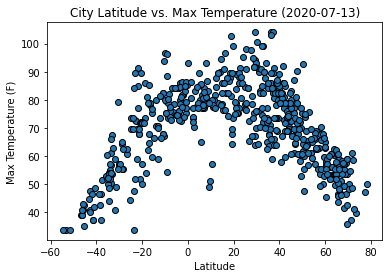

In [8]:
#Create timestamp for chart titles
today = pd.to_datetime("today").strftime('%Y-%m-%d')

#Create Scatterplot
plt.scatter(weather_api_df["Latitude"], weather_api_df["Max Temperature"], edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel(f"Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature ({today})")
plt.show()

#The code plots city latitude and max temperature, resulting in a curve that shows max temperature increasing the closer
#cities are to the equator.

## Latitude vs. Humidity Plot

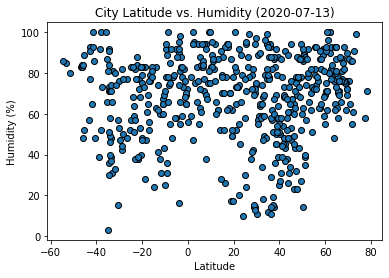

In [9]:
plt.scatter(weather_api_df["Latitude"], weather_api_df["Humidity"], edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel(f"Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({today})")
plt.show()

#This code plots city latitude and humidity, and it shows a rough curve suggesting there is a weak correlation between
#humidity and latitude.

## Latitude vs. Cloudiness Plot

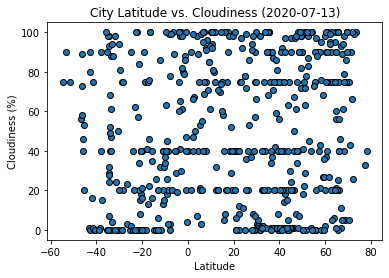

In [10]:
plt.scatter(weather_api_df["Latitude"], weather_api_df["Cloudiness"], edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel(f"Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.show()

#This code plots city latitude and cloudiness, and does not show a clear correlation.

## Latitude vs. Wind Speed Plot

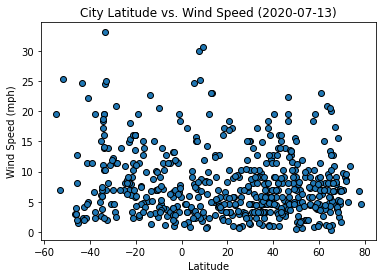

In [11]:
plt.scatter(weather_api_df["Latitude"], weather_api_df["Wind Speed"], edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel(f"Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.show()

#This code plots city latitude and wind speed, showing no clear correlation between the two, but does show that the
#majority of cities fall between 0 and 15 mph wind speed.

## Linear Regression

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots
def Linear_Regression():
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,0),fontsize=15,color="red")

In [13]:
# Create Northern and Southern Hemisphere DataFrames
north_cities = weather_api_df.loc[(weather_api_df["Latitude"]>0)]

south_cities = weather_api_df.loc[(weather_api_df["Latitude"]<0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

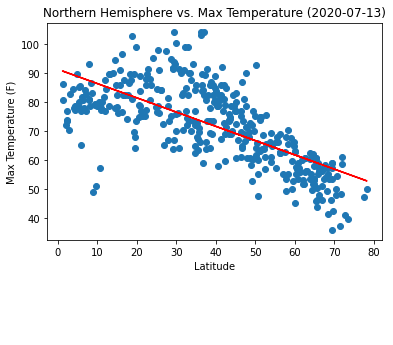

In [14]:
x_values = north_cities["Latitude"]
y_values = north_cities["Max Temperature"]

Linear_Regression()
plt.xlabel("Latitude")
plt.ylabel(f"Max Temperature (F)")
plt.title(f"Northern Hemisphere vs. Max Temperature ({today})")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

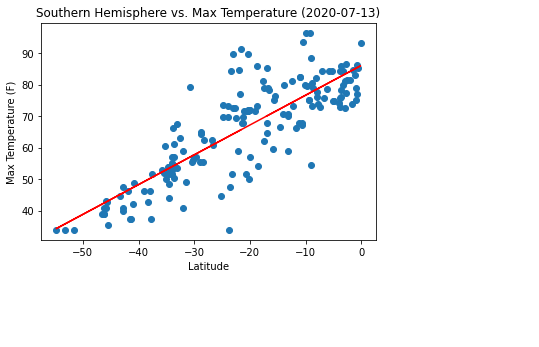

In [15]:
x_values = south_cities["Latitude"]
y_values = south_cities["Max Temperature"]

Linear_Regression()

plt.xlabel("Latitude")
plt.ylabel(f"Max Temperature (F)")
plt.title(f"Southern Hemisphere vs. Max Temperature ({today})")
plt.show()

#These plots shows a clear correlation between distance from equator and max temperature, in which the further distance
#the city is from the equator, the lower the max temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

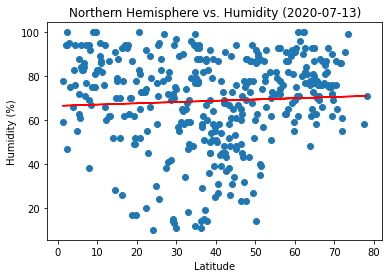

In [16]:
x_values = north_cities["Latitude"]
y_values = north_cities["Humidity"]

Linear_Regression()
plt.xlabel("Latitude")
plt.ylabel(f"Humidity (%)")
plt.title(f"Northern Hemisphere vs. Humidity ({today})")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

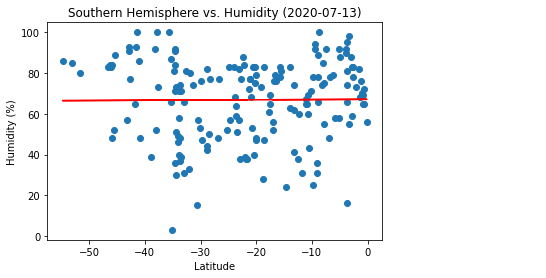

In [17]:
x_values = south_cities["Latitude"]
y_values = south_cities["Humidity"]

Linear_Regression()
plt.xlabel("Latitude")
plt.ylabel(f"Humidity (%)")
plt.title(f"Southern Hemisphere vs. Humidity ({today})")
plt.show()

#These plots show a weak correlation between latitude and humidity, in which cities near the equator have typically
#60% humidity or higher, while as latitude increases, cities spread out further in terms of humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

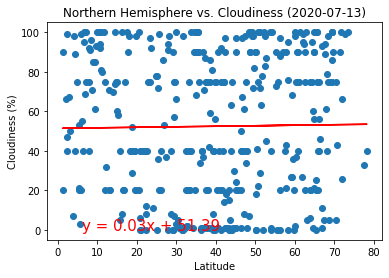

In [18]:
x_values = north_cities["Latitude"]
y_values = north_cities["Cloudiness"]

Linear_Regression()
plt.xlabel("Latitude")
plt.ylabel(f"Cloudiness (%)")
plt.title(f"Northern Hemisphere vs. Cloudiness ({today})")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

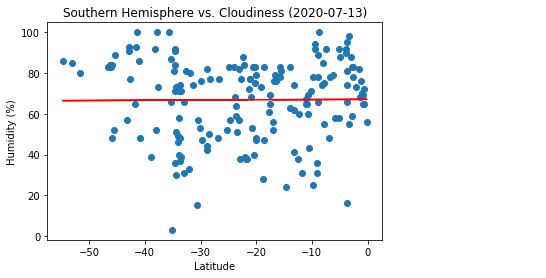

In [19]:
x_values = south_cities["Latitude"]
y_values = south_cities["Humidity"]

Linear_Regression()
plt.xlabel("Latitude")
plt.ylabel(f"Humidity (%)")
plt.title(f"Southern Hemisphere vs. Cloudiness ({today})")
plt.show()

#These plots show no correlation between latitude and cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

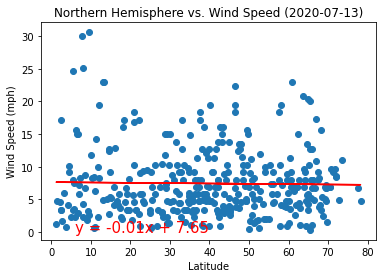

In [20]:
x_values = north_cities["Latitude"]
y_values = north_cities["Wind Speed"]

Linear_Regression()
plt.xlabel("Latitude")
plt.ylabel(f"Wind Speed (mph)")
plt.title(f"Northern Hemisphere vs. Wind Speed ({today})")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

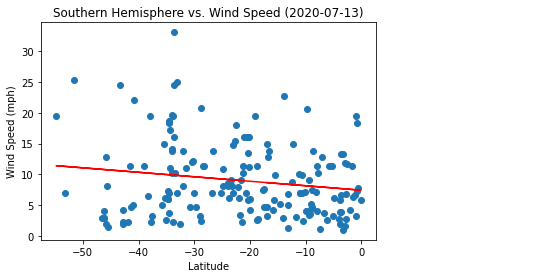

In [21]:
x_values = south_cities["Latitude"]
y_values = south_cities["Wind Speed"]

Linear_Regression()
plt.xlabel("Latitude")
plt.ylabel(f"Wind Speed (mph)")
plt.title(f"Southern Hemisphere vs. Wind Speed ({today})")
plt.show()

#These charts show little to no correlation between latitude and wind speed across cities, with the second chart perhaps
#being skewed by having relatively less landmass between ~-40 to -50 latitude and thus potentially showing a 
#correlation between wind speed and coastal regions moreso than latitude.